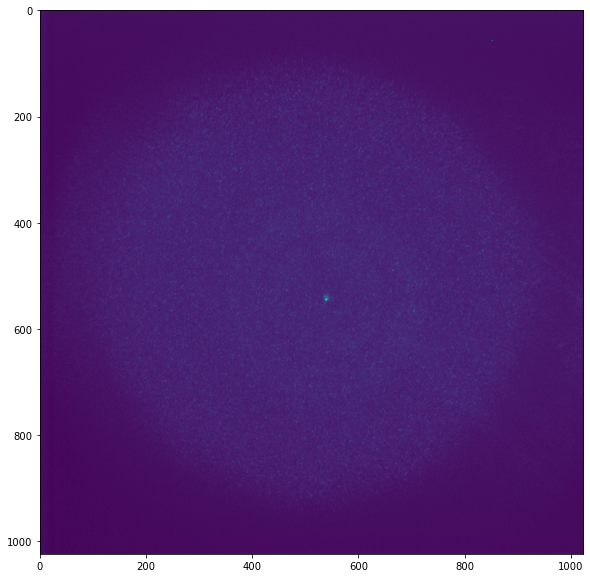

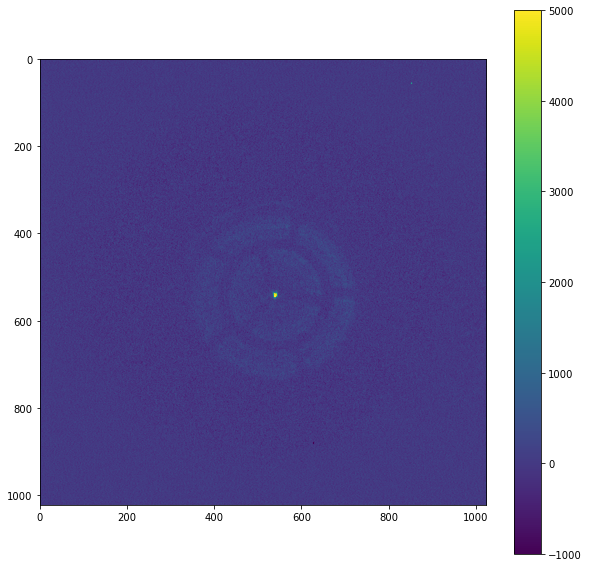

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


y: 544 x: 536 r: 110
y: 544 x: 536 r: 182


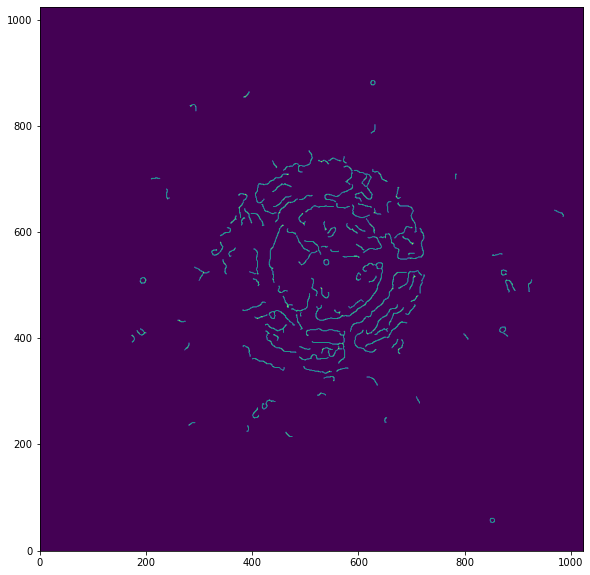

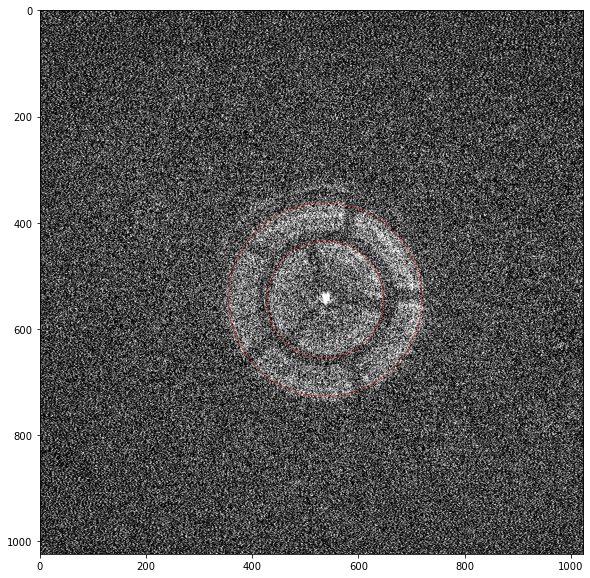

In [116]:
from andor_emccd.driver  import IonDetection, Roi, KinkDetection, Ion
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors
import pandas as pd

#These are the extra modules I use 
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny, peak_local_max
from skimage.draw import circle_perimeter

df=open('RingDat','w')

iondet = IonDetection()
iondet.read_file('single_ion_bgr.txt')
second_image = np.array(iondet.image_data)

iondet.read_file('single_ion.txt')
first_image = np.array(iondet.image_data)

fig = plt.figure(figsize=(10, 10))
plt.imshow(first_image, )

roi = Roi(0, 1024, 0, 1024)

new_image = first_image - second_image

fig = plt.figure(figsize=(10, 10))

plt.imshow(new_image, norm = matplotlib.colors.Normalize(vmin=-1000, vmax =5000))

plt.colorbar()
plt.show()



# Load picture and detect edges
#image = image_data[100:400, 100:400]

#Canny is an edge detetction function  
edges = canny(new_image, sigma=4, low_threshold=70, high_threshold=110)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
ax.imshow(edges, origin='lower')


# Detect radii for rings 
hough_radii = np.arange(110, 200)
hough_res = hough_circle(edges, hough_radii)

# Select the 1000 most prominent circles in that sepcified range
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=2500)

# Draw rings 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
image = color.gray2rgb(new_image)
for center_y, center_x, radius in zip(cy, cx, radii):
    #Only use the rings where the center lies on the ION (Need to find a way to determine these values I determined by hand lol)
    if  center_y == 544 and center_x == 536:
        print("y:", center_y,"x:", center_x,"r:", radius)
        circy, circx = circle_perimeter(center_y, center_x, radius,shape=image.shape)
        image[circy, circx] = (220, 20, 20)


#End 
ax.imshow(image, cmap=plt.cm.gray)
plt.show()




